<a href="https://colab.research.google.com/github/Pranjal-OG/Analyze-This/blob/main/tweet_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📤 Upload your ZIP file containing the dataset (CSV format):


Saving archive (4).zip to archive (4).zip
✅ Dataset found: labeled_data.csv

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None

🔍 First few rows:


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...



📈 Class Distribution:
class
1    19190
2     4163
0     1430
Name: count, dtype: int64


/tmp/ipython-input-3983181943.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='Set2')


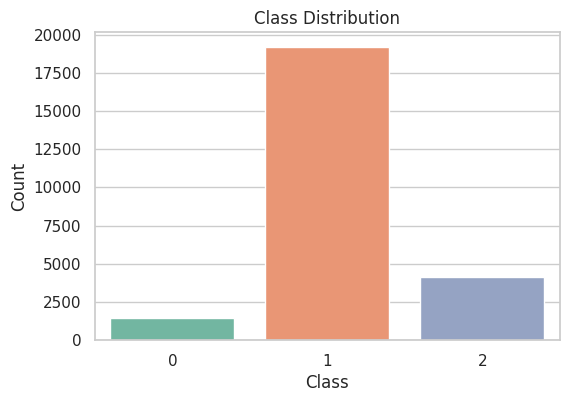

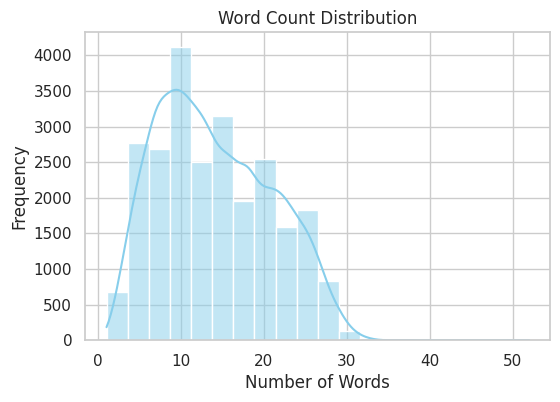

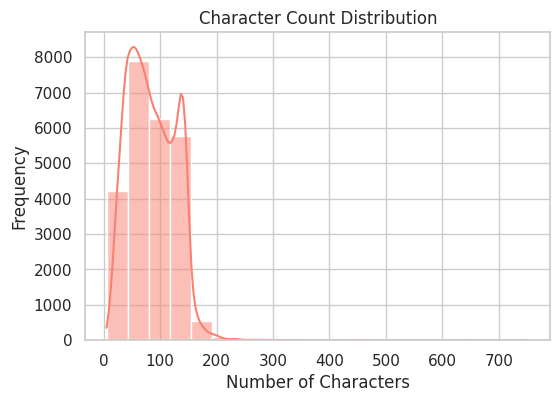


✅ Model Evaluation:
Accuracy: 0.882

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.08      0.14       286
           1       0.89      0.97      0.93      3838
           2       0.85      0.75      0.80       833

    accuracy                           0.88      4957
   macro avg       0.74      0.60      0.62      4957
weighted avg       0.86      0.88      0.86      4957



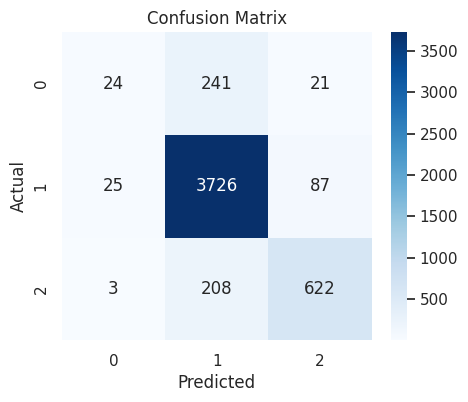


🔍 Performing GridSearchCV (this may take a few minutes)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

🏆 Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

🔥 Best Model Evaluation:
Accuracy: 0.882

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.08      0.14       286
           1       0.89      0.97      0.93      3838
           2       0.85      0.75      0.80       833

    accuracy                           0.88      4957
   macro avg       0.74      0.60      0.62      4957
weighted avg       0.86      0.88      0.86      4957


💬 Predictions for New Data:
Tweet: This is an example of a hateful tweet
Predicted Class: 1

Tweet: This is a neutral tweet
Predicted Class: 1



In [3]:
# ======================================
# 🔧 Import Necessary Libraries
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from zipfile import ZipFile
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import os

# Ensure all plots display properly in Colab
%matplotlib inline
sns.set(style="whitegrid")

# ======================================
# 📂 Step 1: Upload and Extract ZIP file
# ======================================
print("📤 Upload your ZIP file containing the dataset (CSV format):")
uploaded = files.upload()

# Extract the uploaded ZIP file
zip_file_name = list(uploaded.keys())[0]
with ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()

# Automatically detect the extracted CSV file
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
if len(csv_files) == 0:
    raise FileNotFoundError("❌ No CSV file found in the uploaded ZIP!")
csv_file_name = csv_files[0]
print(f"✅ Dataset found: {csv_file_name}")

# ======================================
# 🧾 Step 2: Load the Dataset
# ======================================
data = pd.read_csv(csv_file_name, encoding='utf-8', on_bad_lines='skip')

print("\n📊 Dataset Info:")
print(data.info())
print("\n🔍 First few rows:")
display(data.head())

# ======================================
# 🧹 Step 3: Data Preprocessing
# ======================================
# Drop missing values
data.dropna(inplace=True)

# Ensure the dataset has required columns
required_cols = ['tweet', 'class']
missing_cols = [col for col in required_cols if col not in data.columns]
if missing_cols:
    raise ValueError(f"❌ Missing required columns: {missing_cols}")

# Class distribution
print("\n📈 Class Distribution:")
print(data['class'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# ======================================
# 🔍 Step 4: Exploratory Data Analysis
# ======================================
data['word_count'] = data['tweet'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['tweet'].apply(lambda x: len(str(x)))

plt.figure(figsize=(6, 4))
sns.histplot(data['word_count'], bins=20, kde=True, color='skyblue')
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data['char_count'], bins=20, kde=True, color='salmon')
plt.title("Character Count Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# ======================================
# 🧠 Step 5: Model Training
# ======================================
X = data['tweet']
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# ======================================
# 📊 Step 6: Evaluation
# ======================================
print("\n✅ Model Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC (for binary classification)
if len(np.unique(y)) == 2:
    roc_score = roc_auc_score(y_test, model.predict_proba(X_test_tfidf)[:, 1])
    print("\nROC-AUC Score:", round(roc_score, 4))

# ======================================
# ⚙️ Step 7: Hyperparameter Tuning
# ======================================
print("\n🔍 Performing GridSearchCV (this may take a few minutes)...")

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_tfidf, y_train)

print("\n🏆 Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_model.predict(X_test_tfidf)
print("\n🔥 Best Model Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_best), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# ======================================
# 🚀 Step 8: Deployment Simulation
# ======================================
new_tweets = [
    "This is an example of a hateful tweet",
    "This is a neutral tweet"
]
new_tweets_tfidf = vectorizer.transform(new_tweets)
predictions = best_model.predict(new_tweets_tfidf)

print("\n💬 Predictions for New Data:")
for tweet, prediction in zip(new_tweets, predictions):
    print(f"Tweet: {tweet}\nPredicted Class: {prediction}\n")
